In [ ]:
import os

# Directly set your API key here
os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = "API-Key"
os.environ["TAVILY_API_KEY"] = "API-Key"

In [ ]:
from langchain_tavily import TavilySearch

search = TavilySearch(max_results=2)
search_results = search.invoke("What is the weather in Islamabad")
print(search_results)
# If we want, we can create other tools.
# Once we have all the tools we want, we can put them in a list that we will reference later.
tools = [search]

{'error': SSLError(MaxRetryError("HTTPSConnectionPool(host='api.tavily.com', port=443): Max retries exceeded with url: /search (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)')))"))}


Failed to get info from https://api.smith.langchain.com: LangSmithConnectionError('Connection error caused failure to GET /info in LangSmith API. Please confirm your internet connection. SSLError(MaxRetryError("HTTPSConnectionPool(host=\'api.smith.langchain.com\', port=443): Max retries exceeded with url: /info (Caused by SSLError(SSLCertVerificationError(1, \'[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)\')))"))\nContent-Length: None\nAPI Key: lsv2_********************************************30')
Failed to batch ingest runs: langsmith.utils.LangSmithConnectionError: Connection error caused failure to POST https://api.smith.langchain.com/runs/batch in LangSmith API. Please confirm your internet connection. SSLError(MaxRetryError("HTTPSConnectionPool(host='api.smith.langchain.com', port=443): Max retries exceeded with url: /runs/batch (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certi

In [ ]:
from langchain.chat_models import init_chat_model
import os

if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = "API-Key"

from langchain.chat_models import init_chat_model

model = init_chat_model("llama3-8b-8192", model_provider="groq")

In [6]:
query = "search for weather in islamabad!"
response = model.invoke([{"role": "user", "content": query}])
response.text()

BadRequestError: Error code: 400 - {'error': {'message': 'The model `llama3-8b-8192` has been decommissioned and is no longer supported. Please refer to https://console.groq.com/docs/deprecations for a recommendation on which model to use instead.', 'type': 'invalid_request_error', 'code': 'model_decommissioned'}}

In [27]:
model_with_tools = model.bind_tools(tools)



In [7]:
query = "search for  current weather in islamabad !"
response = model_with_tools.invoke([{"role": "user", "content": query}])

print(f"Message content: {response.text()}\n")
print(f"Tool calls: {response.tool_calls}")

NameError: name 'model_with_tools' is not defined

In [37]:
from langgraph.prebuilt import create_react_agent
agent_executor = create_react_agent(model, tools)

In [39]:
input_message = {"role": "user", "content": "Search for weather in Lahore"}
response = agent_executor.invoke({"messages": [input_message]})

for message in response["messages"]:
    message.pretty_print()

================================ Human Message =================================

Search for weather in Lahore
================================== Ai Message ==================================
Tool Calls:
  tavily_search (7m3hsxber)
 Call ID: 7m3hsxber
  Args:
    query: weather in Lahore
    search_depth: advanced
    time_range: day
    topic: news
================================= Tool Message =================================
Name: tavily_search

{"query": "weather in Lahore", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.reuters.com/business/environment/war-then-water-pakistans-border-villagers-face-back-to-back-evacuations-2025-08-30/", "title": "War then water: Pakistan’s border villagers face back-to-back evacuations - Reuters", "score": 0.09512246, "published_date": "Sat, 30 Aug 2025 05:58:00 GMT", "content": "[1/6]Residents travel with their belongings on a boat as they head towards higher ground, following the monsoon rains and ri

Matplotlib is building the font cache; this may take a moment.


Adjacency Matrix for K7:

    v0  v1  v2  v3  v4  v5  v6
v0   0   1   1   1   1   1   1
v1   1   0   1   1   1   1   1
v2   1   1   0   1   1   1   1
v3   1   1   1   0   1   1   1
v4   1   1   1   1   0   1   1
v5   1   1   1   1   1   0   1
v6   1   1   1   1   1   1   0


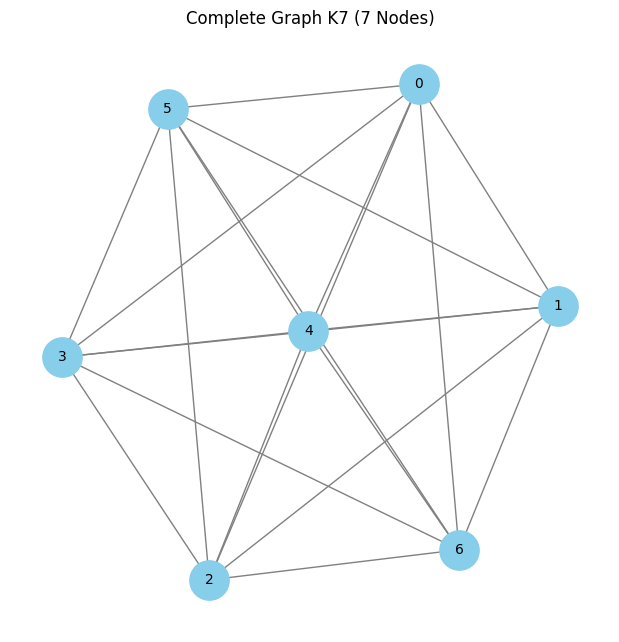

In [6]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a complete graph with 7 nodes (K7)
G = nx.complete_graph(7)  # nodes: 0 to 6

# Get adjacency matrix as numpy array
A = nx.to_numpy_array(G, nodelist=sorted(G.nodes()), dtype=int)

# Convert adjacency matrix into a DataFrame for better display
labels = [f"v{i}" for i in sorted(G.nodes())]
df = pd.DataFrame(A, index=labels, columns=labels)

# Print adjacency matrix
print("Adjacency Matrix for K7:\n")
print(df)

# Save adjacency matrix to CSV
df.to_csv("K7_adjacency_matrix.csv", index=True)

# Visualize the graph
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, seed=42)  # layout for nodes
nx.draw(G, pos, with_labels=True, node_size=800, font_size=10, node_color="skyblue", edge_color="gray")
plt.title("Complete Graph K7 (7 Nodes)")
plt.show()


Adjacency Matrix for Complete Graph K7:

[0, 1, 1, 1, 1, 1, 1]
[1, 0, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 0, 1, 1]
[1, 1, 1, 1, 1, 0, 1]
[1, 1, 1, 1, 1, 1, 0]


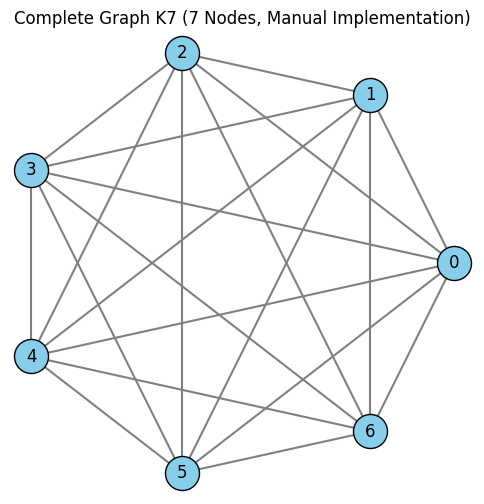

In [7]:
import matplotlib.pyplot as plt

# Number of nodes
n = 7

# Step 1: Create empty adjacency matrix (n x n filled with 0s)
adj_matrix = [[0 for _ in range(n)] for _ in range(n)]

# Step 2: Connect each node to every other node
for i in range(n):
    for j in range(n):
        if i != j:  # no self-loops
            adj_matrix[i][j] = 1

# Step 3: Print adjacency matrix
print("Adjacency Matrix for Complete Graph K7:\n")
for row in adj_matrix:
    print(row)

# Step 4: (Optional) Simple visualization using matplotlib
# We'll plot points in a circle and connect them
import math

# Positions of nodes in a circle
positions = {}
for i in range(n):
    angle = 2 * math.pi * i / n
    positions[i] = (math.cos(angle), math.sin(angle))

# Plot nodes
plt.figure(figsize=(6, 6))
for i, pos in positions.items():
    plt.scatter(pos[0], pos[1], s=600, c="skyblue", edgecolors="black", zorder=2)
    plt.text(pos[0], pos[1], str(i), fontsize=12, ha="center", va="center")

# Plot edges
for i in range(n):
    for j in range(i + 1, n):
        x1, y1 = positions[i]
        x2, y2 = positions[j]
        plt.plot([x1, x2], [y1, y2], "gray", zorder=1)

plt.title("Complete Graph K7 (7 Nodes, Manual Implementation)")
plt.axis("off")
plt.show()
